### How does vaccinating people effect the propagation of a disease in a object orientated model and how does the movement of the objects interact with propagation?
1. your baseline model
1. your question
1. parameters that are fixed (and how the fixed values are guessed)
1. parameter that is changed, including the range of change, and the number of values to try
1. what is measured
1. how it is interpreted


Step 1:  Create a model that incorperates disease propagation into the 

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import time

In [28]:
class Const: # Carefree remote-eating cheaters
    def __init__(self):
        self.n_people = 200
        self.n_steps = 100
        self.vmin = 0.01
        self.vmax = 5*self.vmin
        self.v_decay = 0.9
        self.arena_size = 3
        self.infect_period = 50
        self.social_distance = 0.1**2 
        self.n_vacc_steps = 50
        self.vacc_rate = .5
        self.transmission_rate = .5

In [48]:
def model(c, show_dotses=False, n_trials=1,reinitalize = False, chunk1 = .9, chunk2 = .8, chunk3 = .1, chunk4 = 0):
    history = np.zeros((c.n_steps, n_trials))
    if reinitalize:
        Vaccination_Prob = np.zeros(shape = (c.n_people,c.n_vacc_steps))
        healthy = np.zeros(c.n_people)
        x = np.random.uniform(low=0, high=c.arena_size, size=c.n_people)
        y = np.random.uniform(low=0, high=c.arena_size, size=c.n_people)    
        vx = np.zeros(c.n_people)
        vy = np.zeros(c.n_people)
        for t in range(c.n_vacc_steps):
            x += vx
            y += vy
            vx = vx*c.v_decay + np.random.randn(c.n_people)*c.vmin 
            vy = vy*c.v_decay + np.random.randn(c.n_people)*c.vmin
            vx = np.where(np.logical_or(x>c.arena_size, x<0), -vx , vx)
            vy = np.where(np.logical_or(y>c.arena_size, y<0), -vy , vy)
            x = np.maximum(0,np.minimum(x, c.arena_size)) 
            y = np.maximum(0,np.minimum(y, c.arena_size))
            for i in range(c.n_people):                            
                if x[i] <= (c.arena_size/2) and y[i] <= (c.arena_size/2):
                    Vaccination_Prob[i,t] = chunk1
                elif x[i] > (c.arena_size/2) and y[i] <= (c.arena_size/2):
                    Vaccination_Prob[i,t] = chunk2
                elif x[i] <= (c.arena_size/2) and y[i] > (c.arena_size/2):
                    Vaccination_Prob[i,t] = chunk3
                elif x[i] > (c.arena_size/2) and y[i] > (c.arena_size/2):
                    Vaccination_Prob[i,t] = chunk4
        Vaccinated = Vaccination_Prob.mean(1)
    for i in range(c.n_people):
        if Vaccinated[i] > c.vacc_rate:
            healthy[i] = c.infect_period +1
    for i_trial in range(n_trials):
        x = np.random.uniform(low=0, high=c.arena_size, size=c.n_people)
        y = np.random.uniform(low=0, high=c.arena_size, size=c.n_people)
        vx = np.zeros(c.n_people)
        vy = np.zeros(c.n_people)
        healthy[0] = 1
            
        if show_dotses: # Init plots
            fig = plt.figure(figsize=(3,3))
            ax = plt.subplot(111) # No subplots; just creating axes
            plt.xlim((0,c.arena_size));
            plt.ylim((0,c.arena_size));
            fig.show()
            fig.canvas.draw()

        for t in range(c.n_steps):
            x += vx
            y += vy
            
            vx = vx*c.v_decay + np.random.randn(c.n_people)*c.vmin 
            vy = vy*c.v_decay + np.random.randn(c.n_people)*c.vmin
            # Make them run around (keeps speed somewhat randomized)

            # Reflect from the walls
            vx = np.where(np.logical_or(x>c.arena_size, x<0), -vx , vx)
            vy = np.where(np.logical_or(y>c.arena_size, y<0), -vy , vy)
            x = np.maximum(0,np.minimum(x, c.arena_size)) # Keep them in enclosure
            y = np.maximum(0,np.minimum(y, c.arena_size))
            
            for i in range(c.n_people):
                if healthy[i]>=1 and healthy[i]<=c.infect_period:
                    d = np.square(x-x[i]) + np.square(y-y[i])
                    near = np.argwhere(d < c.social_distance)
                    for n in near:
                        if np.all(healthy[near]) == 0:
                            transmission_prob = np.random.uniform()
                            if transmission_prob < c.transmission_rate:
                                healthy[near] = 1
                    healthy[i] += 1
                else:
                    continue
            if show_dotses: # Actual animation
                ax.clear()
                plt.plot(x[healthy<=c.infect_period], y[healthy<=c.infect_period],'r.', markersize=5)
                plt.plot(x[healthy>c.infect_period], y[healthy>c.infect_period],'c.', markersize=5)
                plt.plot(x[healthy==0], y[healthy==0], 'k.',markersize=5);
                plt.xlim((0,c.arena_size));
                plt.ylim((0,c.arena_size));
                fig.canvas.draw() # Redraws the canvas (key secret command to animate things)
    return np.mean(history, axis=1)

<IPython.core.display.Javascript object>


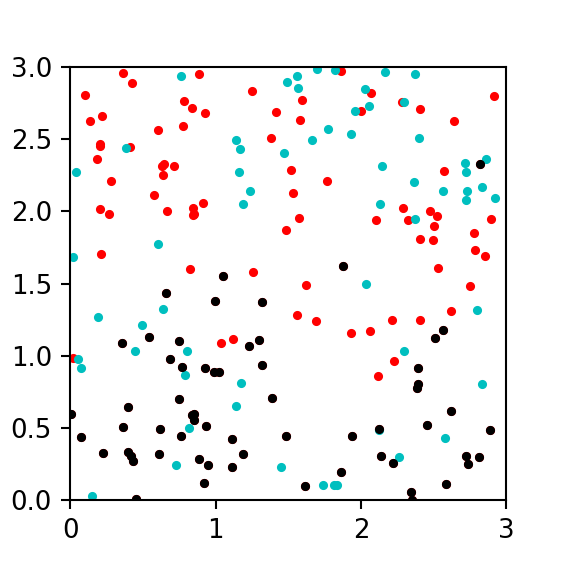

In [49]:
c = Const()
dots = model(c, show_dotses=True,reinitalize = True,chunk1 = .2, chunk2 = .8, chunk3 = .1, chunk4 = 0);

#curve = model(c,reinitalize = True, n_trials = 50);
#plt.plot(curve)
